<a href="https://colab.research.google.com/github/pvlakshm/AIML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Consider an airport security system to assess whether a checked-in bag should
# be flagged for additional screening based on Bag Weight (kg) - a simple
# measurable feature that can correlate with concealed risks in some contexts).
#
# Step 1: Create the data. We have:
# Input: 'M' features (M = 1 here), representing the bag weights (kg).
# Output: 'N' classes (N = 2 here), representing (0 = lowRisk), (1 = highRisk).
#
# The goal of this exercise is to train a model that can predict the probabilities
# of the different possible output classes given an input.

import numpy as np
X = np.array([[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24]])
y = np.array([  0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1])

# i.e., Bags from 19kg onwards are considered to be high risk.

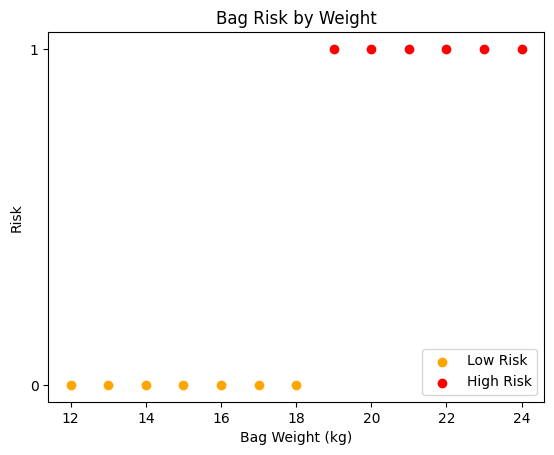

In [2]:
# Step 2: Visualize the data
# Split data by class
X_lowRisk = X[y == 0]
y_lowRisk = y[y == 0]

X_highRisk = X[y == 1]
y_highRisk = y[y == 1]

import matplotlib.pyplot as plt
plt.scatter(X_lowRisk, y_lowRisk, color = 'orange', label = 'Low Risk')
plt.scatter(X_highRisk, y_highRisk, color = 'red', label = 'High Risk')
plt.xlabel('Bag Weight (kg)')
plt.ylabel('Risk')
plt.yticks([0, 1])
plt.title('Bag Risk by Weight')
plt.legend(loc = 'lower right')
plt.show()

In [3]:
# Step 3: Train a Logistic Regression model
# Logistic regression is used to predict the probabilities of the different
# possible output classes given an input.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# In our case we have 2 possible output classes.
# Lets see the predicted probabilities for each class, based on each input
y_prob = model.predict_proba(X)

print("Weight\tActual\tP(class0)\tP(class1)")
# Row-wise output
for xi, yi, pi in zip(X.flatten(), y, y_prob):
    p0 = round(pi[0], 2)
    p1 = round(pi[1], 2)
    print(f"{xi}\t{yi}\t{p0}\t\t{p1}")

Weight	Actual	P(class0)	P(class1)
12	0	1.0		0.0
13	0	1.0		0.0
14	0	1.0		0.0
15	0	0.98		0.02
16	0	0.95		0.05
17	0	0.86		0.14
18	0	0.64		0.36
19	1	0.36		0.64
20	1	0.14		0.86
21	1	0.05		0.95
22	1	0.02		0.98
23	1	0.0		1.0
24	1	0.0		1.0


In [4]:
# Classify
# We choose a threshold value for the probability, and classify inputs with
# probability greater than the threshold as one class, below the threshold as
# the other.
#
# By convention, 0.5 is used as the threshold. If the predicted probability for
# a class is ≥ 0.5, the input is classified as that class; if not, then it is
# classified as the other class;
#
# Getting probabilities is useful in real-world situations where decisions are
# not black-and-white - where you want to be aware of uncertainties.
# For e.g., in our case, we can tune the threshold based on the "risk" of false
# positives.
#
# Therefore, Lets classify class1 (1 = highRisk) based on predicted probability
# at thresholds of 0.5 (default), 0.7 (lenient), 0.3 (strict).
# Note the following:
#   at threshold = 0.5, the classification matches with the actual dataset
#   at threshold = 0.7, a highRisk bag (19 kg) is excluded (lenient).
#   at threshold = 0.3, a lowRisk bag (18 kg) is included (strict).
# i.e., thresholding changes flagging behavior.

y_prob_highRisk = y_prob[:,1]

thresholds = [0.5, 0.7, 0.3]

print("Weight\tActual\tProb(HighRisk)\tPred@0.5 (default)\tPred@0.7 (lenient)\tPred@0.3 (strict)")
for xi, yi, pi in zip(X.flatten(), y, y_prob_highRisk):
    p_highRisk = round(pi, 2)
    pred_05 = int(p_highRisk >= thresholds[0])
    pred_07 = int(p_highRisk >= thresholds[1])
    pred_03 = int(p_highRisk >= thresholds[2])
    print(f"{xi}\t{yi}\t{p_highRisk}\t\t\t{pred_05}\t\t\t{pred_07}\t\t\t{pred_03}")

Weight	Actual	Prob(HighRisk)	Pred@0.5 (default)	Pred@0.7 (lenient)	Pred@0.3 (strict)
12	0	0.0			0			0			0
13	0	0.0			0			0			0
14	0	0.0			0			0			0
15	0	0.02			0			0			0
16	0	0.05			0			0			0
17	0	0.14			0			0			0
18	0	0.36			0			0			1
19	1	0.64			1			0			1
20	1	0.86			1			1			1
21	1	0.95			1			1			1
22	1	0.98			1			1			1
23	1	1.0			1			1			1
24	1	1.0			1			1			1


In [5]:
# Lets check the weights at the various thresholds.
from scipy.interpolate import interp1d

# Interpolator to find X (weights) where y_prob_1 crosses thresholds
f_interp = interp1d(y_prob_highRisk, X.flatten())

# Thresholds and their crossing points
crossings = [f_interp(th) for th in thresholds]

print(f"At default threshold of {thresholds[0]} bags above {crossings[0]:.1f} kg => highRisk")
print(f"At lenient threshold of {thresholds[1]} bags above {crossings[1]:.1f} kg => highRisk")
print(f"At strict threshold of {thresholds[2]} bags above {crossings[2]:.1f} kg => highRisk")

At default threshold of 0.5 bags above 18.5 kg => highRisk
At lenient threshold of 0.7 bags above 19.3 kg => highRisk
At strict threshold of 0.3 bags above 17.7 kg => highRisk


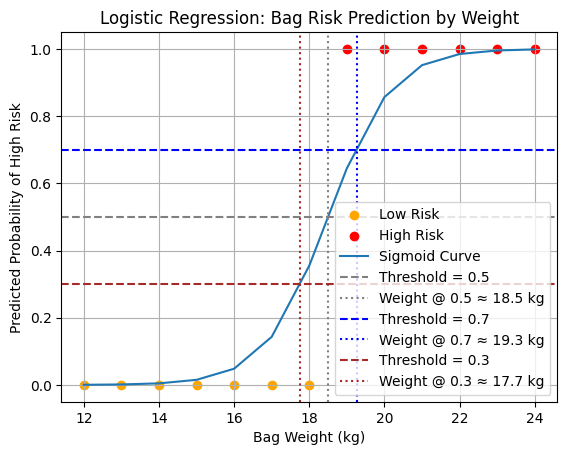

In [6]:
# Visualize
#plt.figure(figsize=(9, 6))
plt.scatter(X_lowRisk, y_lowRisk, color = 'orange', label = 'Low Risk')
plt.scatter(X_highRisk, y_highRisk, color = 'red', label = 'High Risk')

# Plot sigmoid curve
plt.plot(X, y_prob_highRisk, label = 'Sigmoid Curve')

# Plot thresholds (horizontal and vertical lines)
colors = ['gray', 'blue', 'brown']
for th, x_cross, c in zip(thresholds, crossings, colors):
    plt.axhline(y = th, color = c, linestyle = 'dashed', label = f'Threshold = {th}')
    plt.axvline(x = x_cross, color=c, linestyle='dotted', label=f'Weight @ {th:.1f} ≈ {x_cross:.1f} kg')

# Labels and legend
plt.xlabel('Bag Weight (kg)')
plt.ylabel('Predicted Probability of High Risk')
plt.title('Logistic Regression: Bag Risk Prediction by Weight')
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()